# Pima Indian Diabetes Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

## Loading and Reviewing the Data

In [2]:
data_frame = pd.read_csv("pimadataorig.csv")

In [3]:
data_frame.shape

(768, 9)

In [4]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data_frame.tail(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Definition of features
From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| num_preg     | number of pregnancies         |
| glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| diastolic_bp | Diastolic blood pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
|insulin | 2-Hour serum insulin (mu U/ml) |
| bmi |  Body mass index (weight in kg/(height in m)^2) |
| diab_pred |  Diabetes pedigree function |
| Age (years) | Age (years)|
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=False) |  Why is our data boolean (True/False)? |


## Check for null values

In [6]:
print (data_frame.isnull().values.any())

False


### Correlated Feature Check

Helper function that displays correlation by color.  Red is most correlated, Blue least.

In [7]:
def plot_corr(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data_frame.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

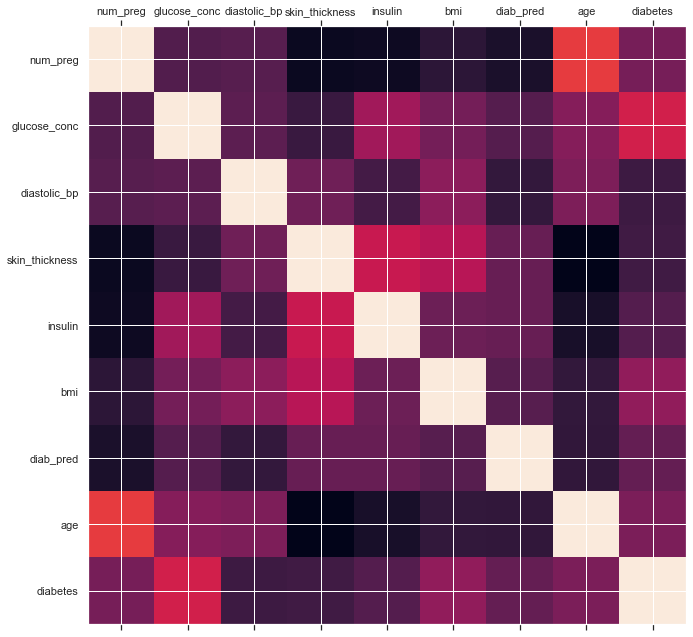

In [8]:
plot_corr(data_frame)

In [9]:
data_frame.corr()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The skin and thickness columns are correlated 1 to 1.  Dropping the skin column

In [14]:
#del data_frame['skin']

In [11]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check for additional correlations

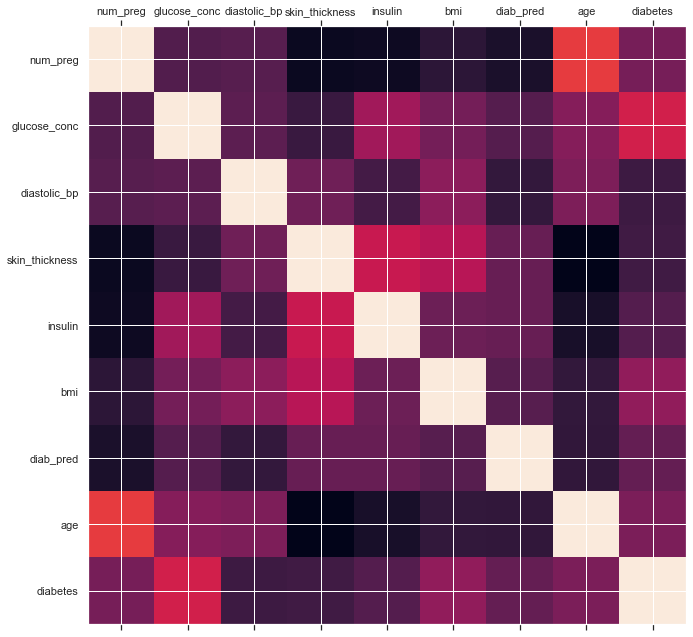

In [12]:
plot_corr(data_frame)

The correlations look good.  There appear to be no coorelated columns.

## Mold Data

### Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

In [13]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Change diabetes from boolean to integer, True=1, False=0

In [14]:
diabetes_map = {True : 1, False : 0}
data_frame['diabetes'] = data_frame['diabetes'].map(diabetes_map)

Verify that the diabetes data type has been changed.

In [15]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check for null values

In [16]:
data_frame.isnull().values.any()

False

No obvious null values.

### Check class distribution 

Rare events are hard to predict

In [17]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['diabetes'] == 1])
num_false = len(data_frame.loc[data_frame['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [18]:
import sklearn as sk
from sklearn.model_selection import train_test_split

Good distribution of true and false cases.  No special work needed.

### Spliting the data 

70% for training, 30% for testing

In [18]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = data_frame[feature_col_names].values     # predictor feature columns (8 X m)
y = data_frame[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=50) 
                            # test_size = 0.3 is 30%, 50 is the answer to everything

We check to ensure we have the the desired 70% train, 30% test split of the data

In [19]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

69.92% in training set
30.08% in test set


#### Verifying predicted value was split correctly

In [20]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 1]), (len(data_frame.loc[data_frame['diabetes'] == 1])/len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 0]), (len(data_frame.loc[data_frame['diabetes'] == 0])/len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 185 (34.45%)
Training False : 352 (65.55%)

Test True      : 83 (35.93%)
Test False     : 148 (64.07%)


### Post-split Data Preparation

#### Hidden Missing Values

In [21]:
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?

How many rows have have unexpected 0 values?

In [23]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing glucose_conc: {0}".format(len(data_frame.loc[data_frame['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(data_frame.loc[data_frame['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(data_frame.loc[data_frame['skin_thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(data_frame.loc[data_frame['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(data_frame.loc[data_frame['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(data_frame.loc[data_frame['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(data_frame.loc[data_frame['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [24]:
import sklearn

#### Impute with the mean

In [27]:
from sklearn.impute import SimpleImputer

#Impute with mean all 0 readings
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer = SimpleImputer(missing_values=0, strategy="mean")

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## Performance on Training Data


In [28]:
# this returns array of predicted results
prediction_from_trained_data = nb_model.predict(X_train)

In [29]:
from sklearn import metrics

nb_accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our naive bayes model is : {0:.2f}".format(nb_accuracy))

Accuracy of our naive bayes model is : 0.77


## Performance on Testing Data

In [32]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

nb_accuracy_testdata = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our naive bayes model is: {0:0.2f}".format(nb_accuracy_testdata))

Accuracy of our naive bayes model is: 0.73


In [40]:
print ("Confusion Matrix")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[28 25]
 [17 84]]


In [33]:
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.54      0.59        83
           0       0.76      0.83      0.80       148

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231



# Random Forrest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=50)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

# Predict Training Data

In [35]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.2f}".format(rf_accuracy))

Accuracy: 1.00


# Predict Testing Data

In [37]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.2f}".format(rf_accuracy_testdata))

Accuracy: 0.74


In [40]:
import plotting as plot

print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[ 44  39]
 [ 20 128]]
Classification Report

              precision    recall  f1-score   support

           1       0.69      0.53      0.60        83
           0       0.77      0.86      0.81       148

    accuracy                           0.74       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



#Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=50)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print ("Accuracy : {0:.2f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

print ("Confusion Matrix")

print (metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))

print ("")

print ("Classification Report")

print (metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))

Accuracy : 0.76
Confusion Matrix
[[ 43  40]
 [ 15 133]]

Classification Report
              precision    recall  f1-score   support

           1       0.74      0.52      0.61        83
           0       0.77      0.90      0.83       148

    accuracy                           0.76       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



C:\Users\madhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
# this returns array of predicted results
prediction_from_trained_data = lr_model.predict(X_train)

In [43]:
lr_predict_train = lr_model.predict(X_train)

#get accuracy
lr_accuracy = metrics.accuracy_score(y_train, lr_predict_train)

#print accuracy
print ("Accuracy: {0:.2f}".format(lr_accuracy))

Accuracy: 0.79


In [44]:
lr_predict_test = lr_model.predict(X_test)

#get accuracy
lr_accuracy_testdata = metrics.accuracy_score(y_test, lr_predict_test)

#print accuracy
print ("Accuracy: {0:.2f}".format(lr_accuracy_testdata))

Accuracy: 0.76


#Support vector Machine

In [45]:
from sklearn.svm import SVC
# Create a RandomForestClassifier object
svm_model = SVC(kernel='linear', C=1, random_state=50)

svm_model.fit(X_train, y_train.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=50, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
# this returns array of predicted results
prediction_from_trained_data = svm_model.predict(X_train)

In [47]:
from sklearn import metrics

svm_accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our SVM model is : {0:.2f}".format(svm_accuracy))

Accuracy of our SVM model is : 0.79


In [48]:
svm_predict_test = svm_model.predict(X_test)

#get accuracy
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)

#print accuracy
print ("Accuracy: {0:.2f}".format(svm_accuracy_testdata))

Accuracy: 0.74


In [49]:
import plotting as plot

print ("Confusion Matrix for Support Vector Amchine")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

Confusion Matrix for Support Vector Amchine
[[ 39  44]
 [ 16 132]]

Classification Report

              precision    recall  f1-score   support

           1       0.71      0.47      0.57        83
           0       0.75      0.89      0.81       148

    accuracy                           0.74       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.74      0.74      0.73       231



In [50]:
from sklearn.neural_network import MLPClassifier
# Create a RandomForestClassifier object
ann_model = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500, random_state=50)

ann_model.fit(X_train, y_train.ravel())

C:\Users\madhu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=50, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [51]:
# this returns array of predicted results
prediction_from_trained_data = ann_model.predict(X_train)

In [52]:
from sklearn import metrics

ann_accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our ANN model is : {0:.2f}".format(ann_accuracy))

Accuracy of our ANN model is : 0.80


In [53]:
ann_predict_test = ann_model.predict(X_test)

#get accuracy
ann_accuracy_testdata = metrics.accuracy_score(y_test, ann_predict_test)

#print accuracy
print ("Accuracy: {0:.2f}".format(ann_accuracy_testdata))

Accuracy: 0.72


In [54]:
import plotting as plot

print ("Confusion Matrix for Artificial Neural Network")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, ann_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, ann_predict_test, labels=[ 1,0])))

Confusion Matrix for Artificial Neural Network
[[ 38  45]
 [ 20 128]]

Classification Report

              precision    recall  f1-score   support

           1       0.66      0.46      0.54        83
           0       0.74      0.86      0.80       148

    accuracy                           0.72       231
   macro avg       0.70      0.66      0.67       231
weighted avg       0.71      0.72      0.70       231



#Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

#create Gaussian Naive Bayes model object and train it with the data
dt_model = DecisionTreeClassifier(random_state=50)

dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

In [60]:
# this returns array of predicted results
prediction_from_trained_data = dt_model.predict(X_train)

In [63]:
from sklearn import metrics

dt_accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our DT model is : {0:.2f}".format(dt_accuracy))

Accuracy of our DT model is : 1.00


In [64]:
dt_predict_test = dt_model.predict(X_test)

#get accuracy
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)

#print accuracy
print ("Accuracy: {0:.2f}".format(dt_accuracy_testdata))

Accuracy: 0.68


In [65]:
import plotting as plot

print ("Confusion Matrix for DT")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[ 1,0])))

Confusion Matrix for DT
[[ 46  37]
 [ 38 110]]

Classification Report

              precision    recall  f1-score   support

           1       0.55      0.55      0.55        83
           0       0.75      0.74      0.75       148

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



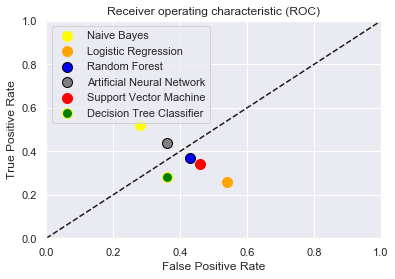

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# fpr, tpr
naive_bayes = np.array([0.28, 0.52])
logistic = np.array([0.54, 0.26])
random_forest = np.array([0.43, 0.37])
ann = np.array([0.36, 0.44])
svm = np.array([0.46, 0.34])
dt = np.array([0.52, 0.28])

#plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='yellow', edgecolors='yellow', s=100)
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=100)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=100)
plt.scatter(ann[0], ann[1], label = 'Artificial Neural Network', facecolors='gray', edgecolors='black', s=100)
plt.scatter(svm[0], svm[1], label = 'Support Vector Machine', facecolors='red', edgecolors='red', s=100)
plt.scatter(ann[0], dt[1], label = 'Decision Tree Classifier', facecolors='green', edgecolors='yellow', s=100)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc='upper left')

plt.show()

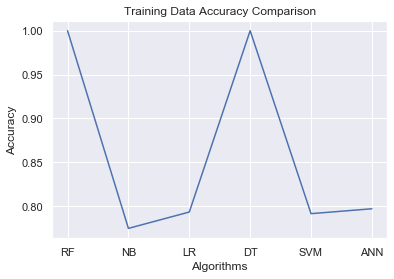

In [66]:
# importing the required module 
import matplotlib.pyplot as plt 
# corresponding y axis values   
x = ["RF","NB","LR","DT","SVM","ANN"]
# corresponding y axis values 
y = [rf_accuracy,nb_accuracy,lr_accuracy,dt_accuracy,svm_accuracy,ann_accuracy] 

# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('Algorithms') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Training Data Accuracy Comparison') 
  
# function to show the plot 
plt.show()

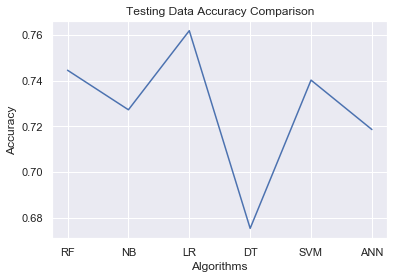

In [67]:
# importing the required module 
import matplotlib.pyplot as plt 
# corresponding y axis values   
x = ["RF","NB","LR","DT","SVM","ANN"]
# corresponding y axis values 
y = [rf_accuracy_testdata,nb_accuracy_testdata,lr_accuracy_testdata,dt_accuracy_testdata,svm_accuracy_testdata,ann_accuracy_testdata] 

# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('Algorithms') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Testing Data Accuracy Comparison') 
  
# function to show the plot 
plt.show()